<a href="https://colab.research.google.com/github/NiharikaShrivastava/Stock-Market-Predection/blob/main/Stock_Market_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
import math

In [2]:
ticker_symbol = "AMZN"
stock_data = yf.download(ticker_symbol, start="2014-01-01", end="2025-10-26")

print(stock_data)
data = stock_data[['Close']].values
print(data)

/tmp/ipython-input-1060559538.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start="2014-01-01", end="2025-10-26")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AMZN        AMZN        AMZN        AMZN      AMZN
Date                                                                
2014-01-02   19.898500   19.968000   19.701000   19.940001  42756000
2014-01-03   19.822001   20.135500   19.811001   19.914499  44204000
2014-01-06   19.681499   19.850000   19.421000   19.792500  63412000
2014-01-07   19.901501   19.923500   19.714500   19.752001  38320000
2014-01-08   20.096001   20.150000   19.802000   19.923500  46330000
...                ...         ...         ...         ...       ...
2025-10-20  216.479996  216.690002  213.589996  213.880005  38882800
2025-10-21  222.029999  223.320007  217.990005  218.429993  50494600
2025-10-22  217.949997  220.009995  216.520004  219.300003  44308500
2025-10-23  221.089996  221.300003  218.179993  219.000000  31540000
2025-10-24  224.210007  225.399994  221.899994  221.970001  38685100

[2972 rows x 5 columns]
[[ 19.898

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

time_step = 60
X, y = [], []
for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i - time_step:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [4]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
def build_model(model_type, units=100):
    model = Sequential()
    if model_type == "RNN":
        model.add(SimpleRNN(units, input_shape=(X_train.shape[1], 1)))
    elif model_type == "LSTM":
        model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))
    elif model_type == "GRU":
        model.add(GRU(units, input_shape=(X_train.shape[1], 1)))
    else:
        raise ValueError("Invalid model type")

    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

In [5]:
models = ["RNN", "LSTM", "GRU"]
results = {}

for m in models:
    print(f"\n🔹 Training {m} Model...")
    model = build_model(m)
    history = model.fit(X_train, y_train, epochs=20, batch_size=16,
                        validation_data=(X_test, y_test), verbose=1)

    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

    results[m] = {'Model': model, 'MSE': mse, 'RMSE': rmse, 'MAE': mae,
                  'Predicted': y_pred_rescaled, 'Actual': y_test_rescaled}


🔹 Training RNN Model...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0111 - val_loss: 0.0028
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.5871e-04 - val_loss: 7.9436e-04
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.5088e-04 - val_loss: 8.3169e-04
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.4475e-04 - val_loss: 7.6802e-04
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.8168e-04 - val_loss: 4.7635e-04
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.5945e-04 - val_loss: 0.0012
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.6632e-04 - val_loss: 5.4307e-04
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.5577e-04 - val_loss: 7.1379e-04
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.4782e-04 - val_loss: 3.2927e-04
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.4522e-04 - val_loss: 7.6967e-04
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.9984e-04

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0228 - val_loss: 8.4419e-04
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.8883e-04 - val_loss: 6.5811e-04
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 3.6580e-04 - val_loss: 9.5109e-04
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 2.4364e-04 - val_loss: 6.4616e-04
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 2.4093e-04 - val_loss: 5.8253e-04
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 2.2186e-04 - val_loss: 6.9237e-04
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 2.1804e-04 - val_loss: 5.2384e-04
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.9299e-04 - val_loss: 4.4570e-04
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 2.5110e-04 - val_loss: 4.0228e-04
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 1.6910e-04 - val_loss: 4.0326e-04
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 2.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0138 - val_loss: 3.3148e-04
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 1.3984e-04 - val_loss: 3.1307e-04
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 1.1939e-04 - val_loss: 4.0373e-04
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 1.4500e-04 - val_loss: 2.8512e-04
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 1.2641e-04 - val_loss: 2.7215e-04
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 1.1029e-04 - val_loss: 2.8415e-04
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 1.2136e-04 - val_loss: 3.3059e-04
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 1.2128e-04 - val_loss: 3.2622e-04
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 1.1155e-04 - val_loss: 5.3474e-04
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 1.1611e-04 - val_loss: 2.6871e-04
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss:


 Model Comparison Metrics
  Model        MSE      RMSE       MAE
0   RNN  15.222766  3.901636  2.881060
1  LSTM  27.750955  5.267917  4.267189
2   GRU  22.909800  4.786418  3.741322


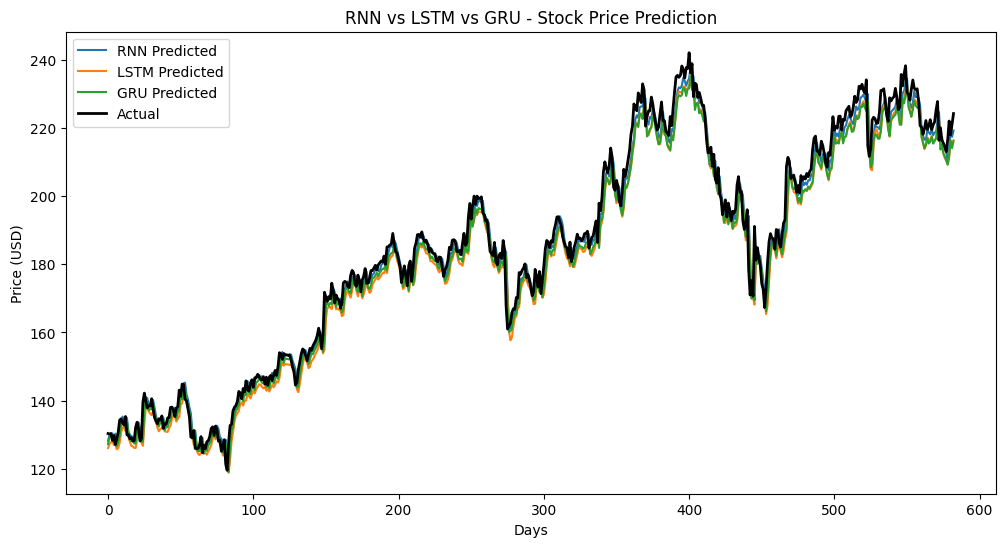

In [6]:
print("\n Model Comparison Metrics")
comparison = pd.DataFrame([
    {"Model": m, "MSE": r['MSE'], "RMSE": r['RMSE'], "MAE": r['MAE']}
    for m, r in results.items()
])
print(comparison)


plt.figure(figsize=(12,6))
for m in models:
    plt.plot(results[m]['Predicted'], label=f"{m} Predicted")
plt.plot(results['RNN']['Actual'], label='Actual', color='black', linewidth=2)
plt.title("RNN vs LSTM vs GRU - Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [7]:
predictions = {}

for m in models:
    model = results[m]['Model']
    last_60_days = scaled_data[-time_step:]
    last_60_days = np.reshape(last_60_days, (1, time_step, 1))
    next_day_scaled = model.predict(last_60_days)
    next_day_price = scaler.inverse_transform(next_day_scaled)
    predictions[m] = next_day_price[0][0]
    print(f" Predicted Next Day Closing Price using {m}: ${next_day_price[0][0]:.2f}")

best_model_name = comparison.sort_values(by="RMSE").iloc[0]['Model']
best_model = results[best_model_name]['Model']

print("\n Best Model Based on RMSE:", best_model_name)
print(f"Predicted Next Day Closing Price for {ticker_symbol} using Best Model ({best_model_name}): ${predictions[best_model_name]:.2f}")

print("\n Summary of All Model Predictions:")
for m, val in predictions.items():
    print(f"{m}: ${val:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
 Predicted Next Day Closing Price using RNN: $220.55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
 Predicted Next Day Closing Price using LSTM: $218.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
 Predicted Next Day Closing Price using GRU: $218.83

 Best Model Based on RMSE: RNN
Predicted Next Day Closing Price for AMZN using Best Model (RNN): $220.55

 Summary of All Model Predictions:
RNN: $220.55
LSTM: $218.89
GRU: $218.83
